<div style="color:white;
            display:fill;
            border-radius:40px;
            background-color:#FFEECC;
            font-size:50%;
            font-family:Helvetica;
            letter-spacing:1px">
    <h3 style='padding: 10px;
              color:black;
              text-align:left;'>
        Accuracy in the end: 87%
    </h3>
</div>

<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#6096B4;
            font-size:70%;
            font-family:Helvetica;
            letter-spacing:2px">
    <h3 style='padding: 15px;
              color:white;
              text-align:center;'>
        Table of Contents
    </h3>
</div>

1. **About the Dataset**
    - 1a. Problem Statement
    - 1b. Business Goal


2. **Importing Libraries**
3. **Loading the Dataset**
3. **Understanding the DataFrame**
4. **Data Cleaning**
    - 4a. Drop Unnecessary Columns
    - 4b. Handle Missing Values
    - 4c. Create New Features
    - 4d. Fix the typos in the Dataset
    - 4e. Segregation of Numerical and Categorical Variables


6. **Visualizing the Dataset**
    - 6a. Distribution of the Car Companies
    - 6b. Distribution of Car Prices
    - 6c. Correlation Matrix
    - 6d. Features vs the Price
        - Numerical Features (scatterplot)
        - Categorical Features (Barplot)
    - 6e. Keeping only the Significant Features
    

7. **Data Preparation**
    - 7a. Dummy Variables
    - 7b. Splitting the Dataset into Training and testing Sets
    - 7c. Rescaling the Features
    - 7d. Creating x and y sets
 

8. **Building a Linear Model**
    - 8a. Recursize Feature Elimination (RFE) with Random Forest
    - 8b. Data Modeling and Evaluation
        - Select the best n_estimators and train the model
    
    
9. **Improve the Model's Accuracy**
    - 9a. calculate base 10 logarithm of the target column
    - 9b. Train under different models
    - 9c. Visualize the Models' performances
    

10. **Conclusion**

<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#6096B4;
            font-size:70%;
            font-family:Helvetica;
            letter-spacing:2px">
    <h3 style='padding: 15px;
              color:white;
              text-align:center;'>
        1. About the Dataset
    </h3>
</div>

<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#C86B85;
            font-size:60%;
            font-family:Helvetica;
            letter-spacing:1px">
    <h3 style='padding: 10px;
              color:white;
              text-align:center;'>
        1a. Problem Statement
    </h3>
</div>

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#C86B85;
            font-size:60%;
            font-family:Helvetica;
            letter-spacing:1px">
    <h3 style='padding: 10px;
              color:white;
              text-align:center;'>
        1b. Business Goal
    </h3>
</div>

We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#6096B4;
            font-size:70%;
            font-family:Helvetica;
            letter-spacing:2px">
    <h3 style='padding: 15px;
              color:white;
              text-align:center;'>
        2. Importing Libraries
    </h3>
</div>

In [29]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import math
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#6096B4;
            font-size:70%;
            font-family:Helvetica;
            letter-spacing:2px">
    <h3 style='padding: 15px;
              color:white;
              text-align:center;'>
        3. Loading the Dataset
    </h3>
</div>

In [30]:
df = pd.read_csv('car_data.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [31]:
# Reading the Data Dictionary File

df_stru = pd.read_excel('Data Dictionary - carprices.xlsx')
df_stru.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,DATA DICTONARY,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,1,Car_ID,NaN,NaN,NaN,Unique id of each observation (Interger),NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,2,Symboling,NaN,NaN,NaN,"Its assigned insurance risk rating, A value of...",NaN,NaN


<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#6096B4;
            font-size:70%;
            font-family:Helvetica;
            letter-spacing:2px">
    <h3 style='padding: 15px;
              color:white;
              text-align:center;'>
        4. Understanding the DataFrame
    </h3>
</div>

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [33]:
df.shape

(205, 26)

<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#6096B4;
            font-size:70%;
            font-family:Helvetica;
            letter-spacing:2px">
    <h3 style='padding: 15px;
              color:white;
              text-align:center;'>
        5. Data Cleaning
    </h3>
</div>

<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#C86B85;
            font-size:60%;
            font-family:Helvetica;
            letter-spacing:1px">
    <h3 style='padding: 10px;
              color:white;
              text-align:center;'>
        5a. Drop Unnecessary Columns
    </h3>
</div>

In [34]:
df.drop(['car_ID'], axis=1, inplace=True)

<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#C86B85;
            font-size:60%;
            font-family:Helvetica;
            letter-spacing:1px">
    <h3 style='padding: 10px;
              color:white;
              text-align:center;'>
        5b. Handle Missing Values
    </h3>
</div>

In [35]:
# Handling Missing Values
df.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

There are no missing values

<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#C86B85;
            font-size:60%;
            font-family:Helvetica;
            letter-spacing:1px">
    <h3 style='padding: 10px;
              color:white;
              text-align:center;'>
        5c. Create Features
    </h3>
</div>

In [36]:
# Extracting the car company name from the CarName column
df['CompanyName'] = df['CarName'].str.split(' ').str[0]
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [37]:
# Unique Car Company
df['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#C86B85;
            font-size:60%;
            font-family:Helvetica;
            letter-spacing:1px">
    <h3 style='padding: 10px;
              color:white;
              text-align:center;'>
        5d. Fix the typos in the Dataset
    </h3>
</div>

<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#FAEEE0;
            font-size:60%;
            font-family:Georgia;
            letter-spacing:0px">
    <h3 style='padding: 8px;
              color:black;
              text-align:center;'>
        Typos in the CompanyName Column
    </h3>
</div>

- maxda: mazda
- Nissan: nissan
- porsche: porcshce
- toyota: toyouta
- vokswagen: volkswagen: vw

In [38]:
# Fixing the errors in the CompanyName column
df['CompanyName'] = df['CompanyName'].replace({'maxda': 'mazda', 
                                               'nissan': 'Nissan', 
                                               'porcshce': 'porsche', 
                                               'toyouta': 'toyota', 
                                               'vokswagen': 'volkswagen',
                                               'vw': 'volkswagen'})

<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#FAEEE0;
            font-size:50%;
            font-family:Georgia;
            letter-spacing:0px">
    <h3 style='padding: 8px;
              color:black;
              text-align:center;'>
        Changing the datatype of the column 'symboling' from int to str because it's a categorical variable according to the dictionary file
    </h3>
</div>

In [39]:
df['symboling']= df['symboling'].astype(str)

<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#C86B85;
            font-size:60%;
            font-family:Helvetica;
            letter-spacing:1px">
    <h3 style='padding: 10px;
              color:white;
              text-align:center;'>
        5e. Segregation of Numerical and Categorical Variables
    </h3>
</div>

In [40]:
cat_cols = df.select_dtypes(include=['object']).columns

num_cols = df.select_dtypes(exclude=['object']).columns

df_cat = df[cat_cols]

df_num = df[num_cols]

<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#6096B4;
            font-size:70%;
            font-family:Helvetica;
            letter-spacing:2px">
    <h3 style='padding: 15px;
              color:white;
              text-align:center;'>
        6. Visualizing the Data
    </h3>
</div>

<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#C86B85;
            font-size:60%;
            font-family:Helvetica;
            letter-spacing:1px">
    <h3 style='padding: 10px;
              color:white;
              text-align:center;'>
        6a. Distribution of the Car Companies
    </h3>
</div>

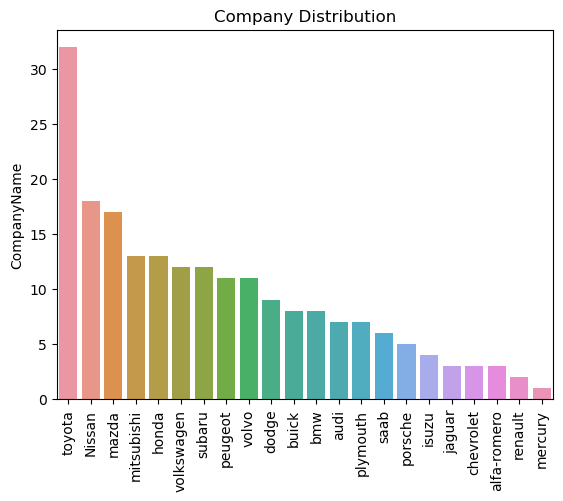

In [41]:
sns.barplot(x=df['CompanyName'].value_counts().index, y=df['CompanyName'].value_counts())
plt.xticks(rotation=90)
plt.title('Company Distribution')
plt.show()


- Toyota is the most common car
- Mercury seems to be the least favoured cars

<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#C86B85;
            font-size:60%;
            font-family:Helvetica;
            letter-spacing:1px">
    <h3 style='padding: 10px;
              color:white;
              text-align:center;'>
        6b. Distribution of Car Prices
    </h3>
</div>

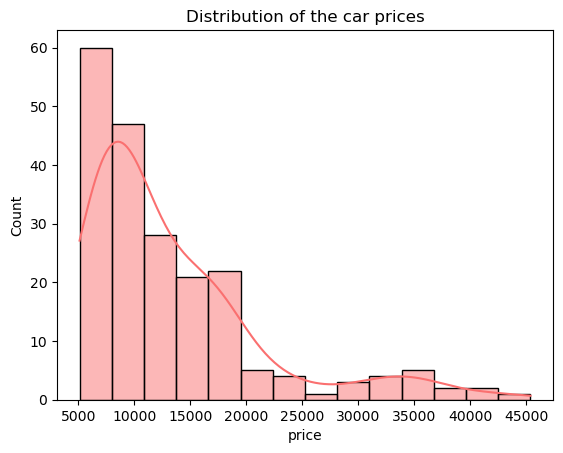

In [42]:
sns.histplot(x=df['price'], kde=True, color='#FA7070')
plt.title('Distribution of the car prices')
plt.show()

The plot seems to be right skewed. The prices of most cars are less than 18,000

<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#C86B85;
            font-size:60%;
            font-family:Helvetica;
            letter-spacing:1px">
    <h3 style='padding: 10px;
              color:white;
              text-align:center;'>
        6c. Correlation Matrix
    </h3>
</div>

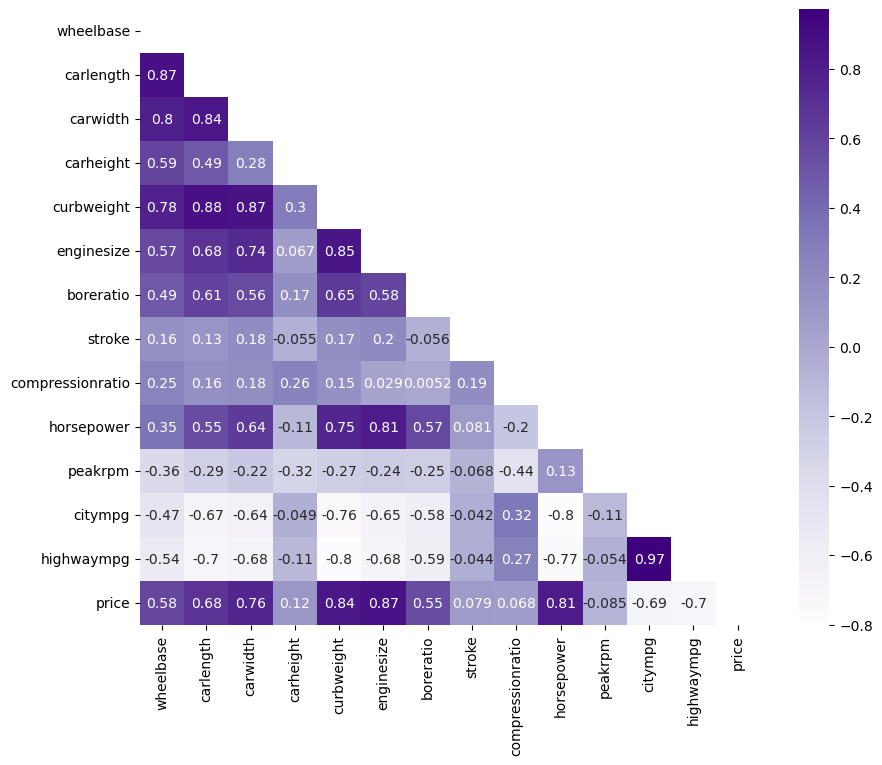

In [43]:
df_corr = df.corr()
mask = np.triu(np.ones_like(df_corr))
corr = df_corr.transpose()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='Purples', annot=True, mask=mask)
plt.show()

<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#C86B85;
            font-size:60%;
            font-family:Helvetica;
            letter-spacing:1px">
    <h3 style='padding: 10px;
              color:white;
              text-align:center;'>
        6d. Features vs the Price
    </h3>
</div>

<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#FAEEE0;
            font-size:60%;
            font-family:Georgia;
            letter-spacing:0px">
    <h3 style='padding: 8px;
              color:black;
              text-align:center;'>
        Numerical Features - Scatterplot
    </h3>
</div>

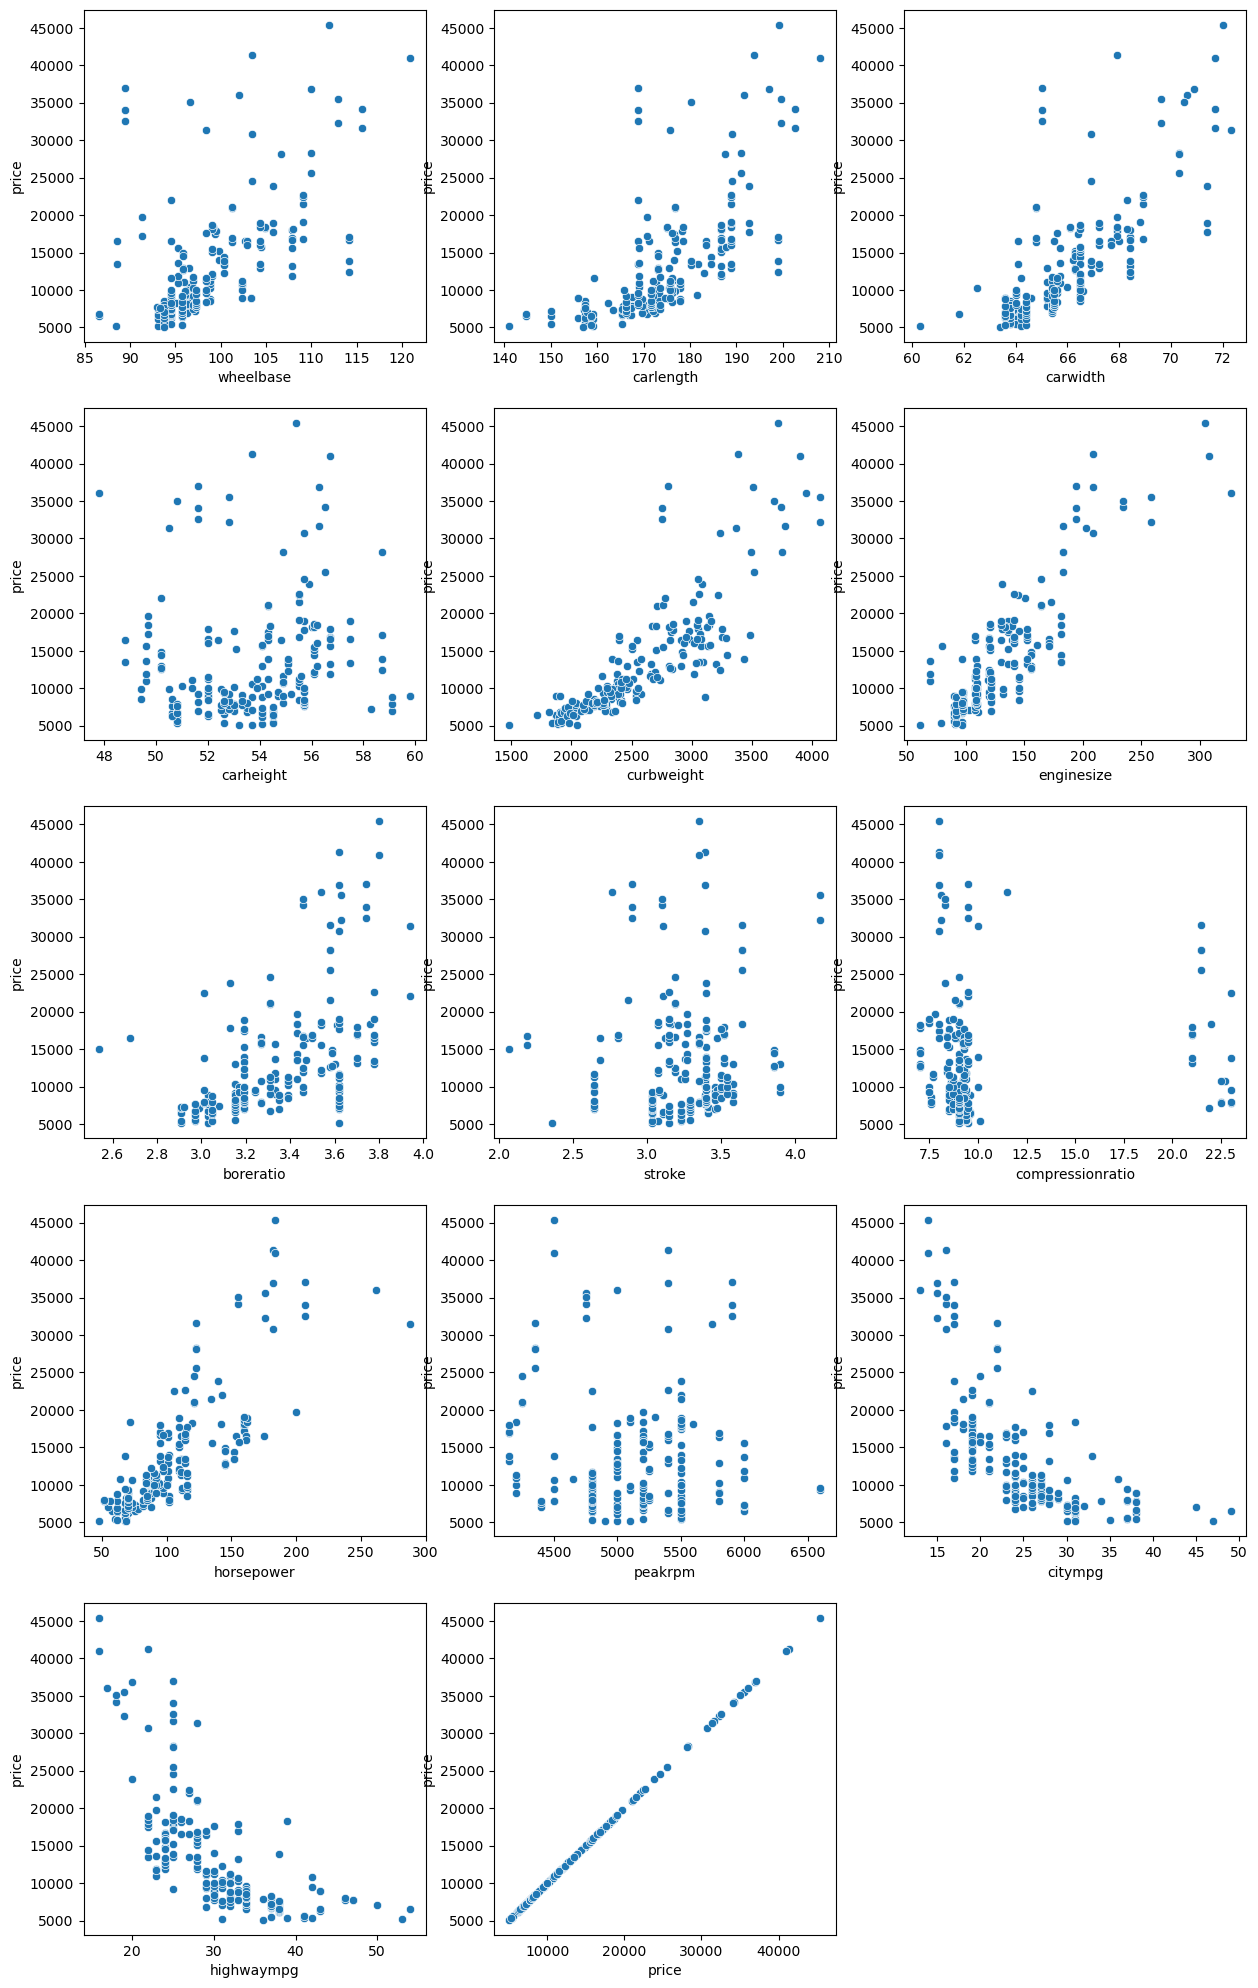

In [44]:
columns = 3
rows = math.ceil(len(num_cols) / columns)

plt.figure(figsize=(columns*5, rows*5))

for i, col in enumerate(num_cols):
    plt.subplot(rows, columns, i+1)
    sns.scatterplot(x=df[col], y=df['price'])

plt.show()

**Features that don't seem to be significant wrt the prices**
- carheight
- compressionratio
- stroke
- peakrpm

<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#FAEEE0;
            font-size:60%;
            font-family:Georgia;
            letter-spacing:0px">
    <h3 style='padding: 8px;
              color:black;
              text-align:center;'>
        Categorical Features - Barplot
    </h3>
</div>

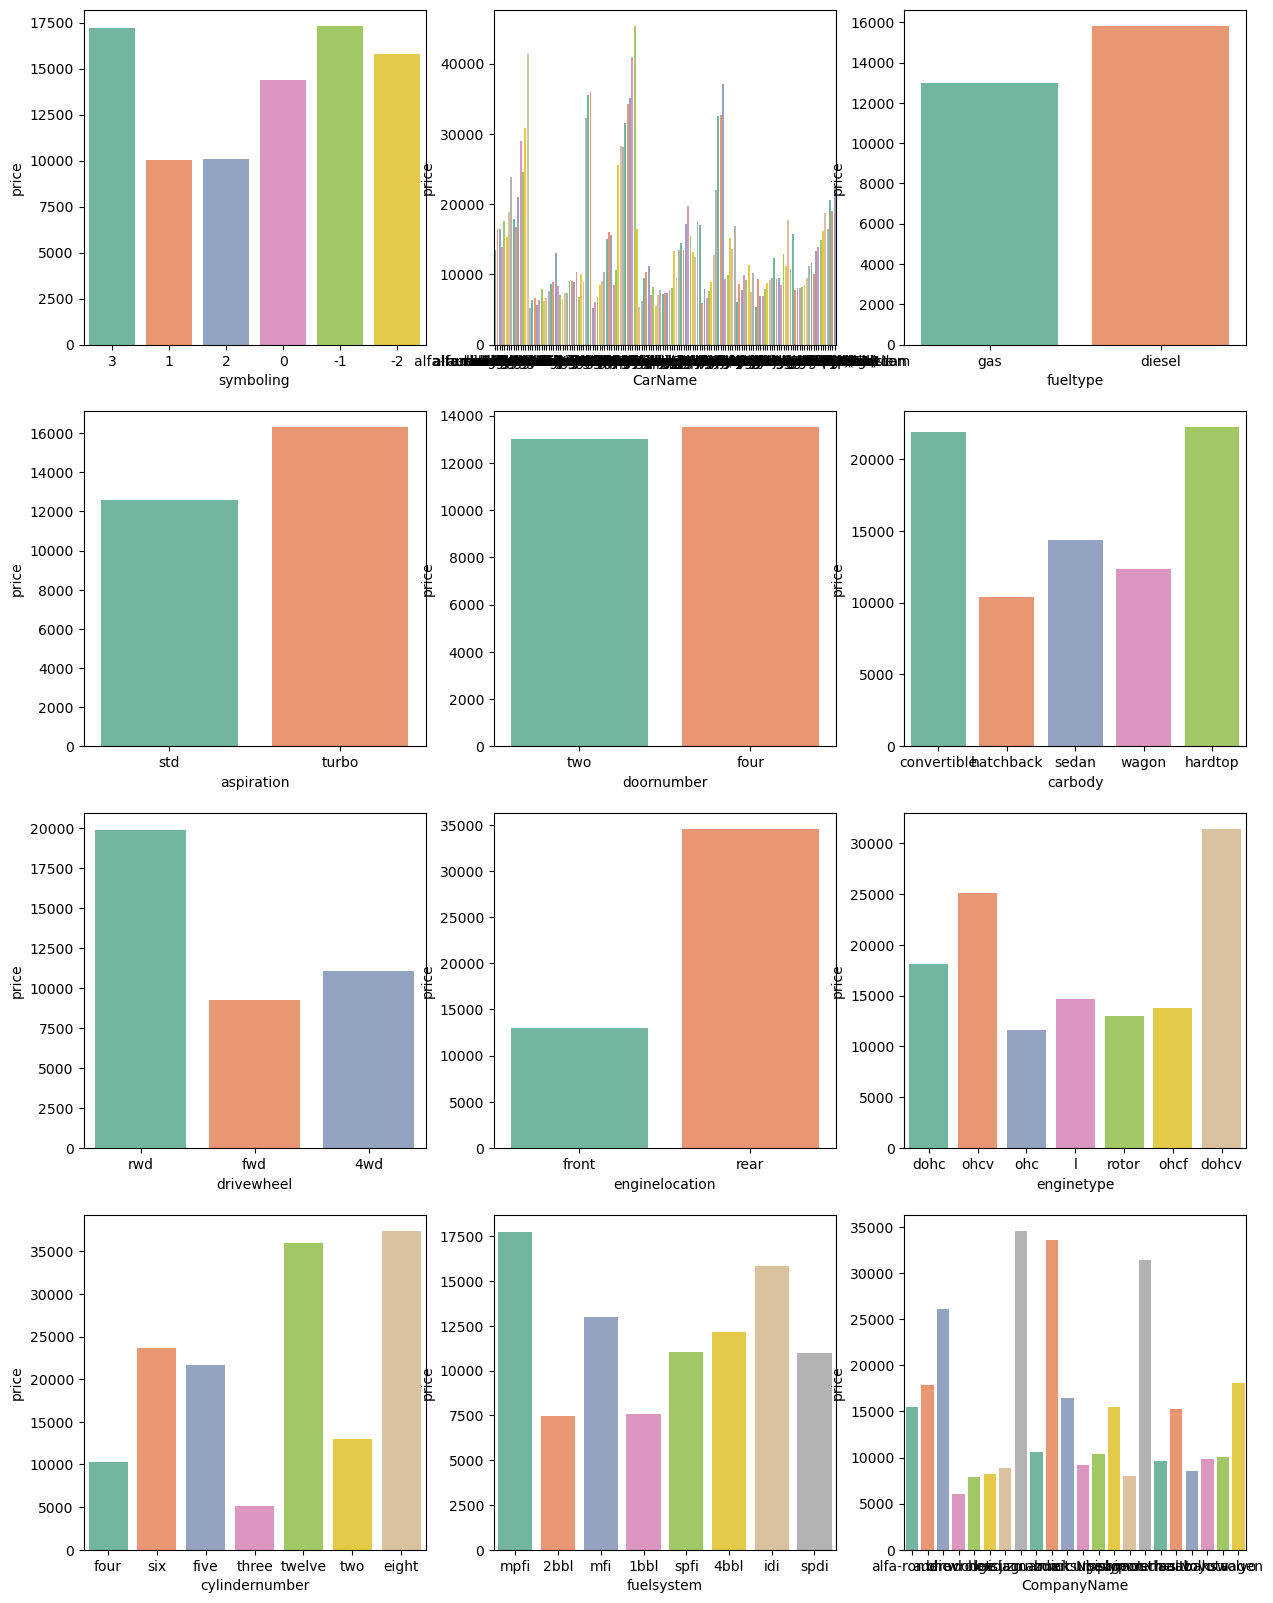

In [45]:
columns = 3
rows = math.ceil(len(cat_cols)/columns)


plt.figure(figsize=(columns*5, rows*5))

for i, col in enumerate(cat_cols):
    plt.subplot(rows, columns, i+1)
    sns.barplot(x=df[col], y=df['price'], ci=False, palette='Set2')
    
plt.show()

**Features that don't seem to be significant wrt the prices**
- symboling
- doornumber
- fuelsystem
- carname
- companyname

<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#C86B85;
            font-size:60%;
            font-family:Helvetica;
            letter-spacing:1px">
    <h3 style='padding: 10px;
              color:white;
              text-align:center;'>
        6e. Keeping only the Significant Features
    </h3>
</div>

In [46]:
df = df[['price','enginetype','fueltype', 
         'aspiration','carbody','cylindernumber', 
         'drivewheel','wheelbase','curbweight',
         'enginesize', 'boreratio','horsepower',
         'citympg','highwaympg', 'carlength','carwidth']]


<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#6096B4;
            font-size:70%;
            font-family:Helvetica;
            letter-spacing:2px">
    <h3 style='padding: 15px;
              color:white;
              text-align:center;'>
        7. Data Preparation
    </h3>
</div>

<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#C86B85;
            font-size:60%;
            font-family:Helvetica;
            letter-spacing:1px">
    <h3 style='padding: 10px;
              color:white;
              text-align:center;'>
        7a. Dummy Variables
    </h3>
</div>


In [47]:
# Categorical columns which are in the new df
sig_cat_col = ['fueltype',
               'aspiration','carbody','drivewheel',
               'enginetype','cylindernumber']

In [48]:
df.shape

(205, 16)

In [49]:
dummies = pd.get_dummies(df[sig_cat_col], drop_first=True)
dummies.shape

(205, 20)

In [50]:
# Add the Results to the Original df
df = pd.concat([df, dummies], axis=1)

In [51]:
# Drop the original variables cuz
# the dummies are already created
df.drop(sig_cat_col, axis=1, inplace=True)
df.shape

(205, 30)

In [52]:
df.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,13495.0,88.6,2548,130,3.47,111,21,27,168.8,64.1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,16500.0,88.6,2548,130,3.47,111,21,27,168.8,64.1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,16500.0,94.5,2823,152,2.68,154,19,26,171.2,65.5,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
3,13950.0,99.8,2337,109,3.19,102,24,30,176.6,66.2,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
4,17450.0,99.4,2824,136,3.19,115,18,22,176.6,66.4,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#C86B85;
            font-size:60%;
            font-family:Helvetica;
            letter-spacing:1px">
    <h3 style='padding: 10px;
              color:white;
              text-align:center;'>
        7b. Splitting the Dataset into Training and testing Sets
    </h3>
</div>

In [53]:
train, test = train_test_split(df, train_size=0.7, random_state=2)


<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#C86B85;
            font-size:60%;
            font-family:Helvetica;
            letter-spacing:1px">
    <h3 style='padding: 10px;
              color:white;
              text-align:center;'>
        7c. Rescaling the Features
    </h3>
</div>


For Simple Linear Regression, scaling doesn't impact model. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. There are two common ways of rescaling:

- Min-Max scaling
- Standardisation (mean-0, sigma-1)

Here, we will use Standardisation Scaling.

In [54]:
scaler = StandardScaler()

In [55]:
sig_num_cols = ['wheelbase','carlength','carwidth',
                'curbweight','enginesize','boreratio',
                'horsepower','citympg','highwaympg',
                'price']

In [56]:
train[sig_num_cols] = scaler.fit_transform(train[sig_num_cols])
train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
78,-0.805408,-0.803922,-1.072197,-0.837272,-1.439566,-0.926060,0.933122,1.120981,-1.338959,-0.713700,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
5,0.215471,0.200031,-0.126030,0.171946,-0.610102,0.095037,-0.928781,-0.804992,0.257299,0.144699,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
198,0.592605,0.940652,0.885973,0.034325,1.011124,1.359253,-1.239099,-1.249448,1.175147,0.551309,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
151,-0.844787,-0.474757,-1.004479,-0.837272,-1.137942,-1.071931,0.933122,1.120981,-1.227221,-1.075132,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
11,0.414746,0.430447,-0.336707,-0.470284,0.558689,-0.123769,-0.308147,-0.212385,0.217392,-0.532985,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0


<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#C86B85;
            font-size:60%;
            font-family:Helvetica;
            letter-spacing:1px">
    <h3 style='padding: 10px;
              color:white;
              text-align:center;'>
        7d. Creating x and y sets
    </h3>
</div>

In [57]:
xtrain = train[train.columns[1:]]
ytrain = train[['price']]

xtest = test[test.columns[1:]]
ytest = test[['price']]

print(xtrain.shape)
print(ytrain.shape)

(143, 29)
(143, 1)


<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#6096B4;
            font-size:70%;
            font-family:Helvetica;
            letter-spacing:2px">
    <h3 style='padding: 15px;
              color:white;
              text-align:center;'>
        8. Building a Linear Model
    </h3>
</div>

In [60]:
model = LinearRegression()

model.fit(xtrain, ytrain)

pred = model.predict(xtest)
score = model.score(xtest, ytest)
score

# acc = r2_score(pred, ytest)
# acc

-3.4058662206603154

In [61]:
model = RandomForestRegressor()
model.fit(xtrain, ytrain)
pred = model.predict(xtest)
model.score(xtest, ytest)

-3.552919569872044

As you can see, Our model is doing terribly.
Let's apply RFE

<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#C86B85;
            font-size:60%;
            font-family:Helvetica;
            letter-spacing:1px">
    <h3 style='padding: 10px;
              color:white;
              text-align:center;'>
        8a. Recursize Feature Elimination (RFE) with Random Forest
    </h3>
</div>

In [62]:
rf = RandomForestRegressor()
# step corresponds to the (integer) number of features to remove at each iteration
rfe = RFE(estimator = rf, n_features_to_select=6, step=1)
rfe = rfe.fit(xtrain, ytrain)

print('Best 10 Features are:')
print(xtrain.columns[rfe.support_])


Best 10 Features are:
Index(['curbweight', 'enginesize', 'horsepower', 'highwaympg', 'carlength',
       'carwidth'],
      dtype='object')


In [63]:
features = list(xtrain.columns[rfe.support_])


In [64]:
print(xtrain.shape)
xtrain = xtrain[features]
print(xtrain.shape)

(143, 29)
(143, 6)


In [65]:
xtest = xtest[features]

<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#C86B85;
            font-size:60%;
            font-family:Helvetica;
            letter-spacing:1px">
    <h3 style='padding: 10px;
              color:white;
              text-align:center;'>
        8b. Data modeling and Evaluation
    </h3>
</div>

<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#FAEEE0;
            font-size:60%;
            font-family:Georgia;
            letter-spacing:0px">
    <h3 style='padding: 8px;
              color:black;
              text-align:center;'>
        Select the best n_estimators and evaluate the model
    </h3>
</div>

In [66]:
estimator=RandomForestRegressor(random_state=2)
param_grid={'n_estimators':[10,15,20,40,50,98,100]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)

n_estimators = grid.best_params_['n_estimators']
print(n_estimators)

10


In [67]:
model = RandomForestRegressor(n_estimators = n_estimators, 
                             criterion = 'mse',
                             n_jobs = -1)

model.fit(xtrain, ytrain)
pred = model.predict(xtest)
score = r2_score(ytest, pred)
score


-3.552867364923789

<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#6096B4;
            font-size:70%;
            font-family:Helvetica;
            letter-spacing:2px">
    <h3 style='padding: 15px;
              color:white;
              text-align:center;'>
        9. Improve the Model's Accuracy
    </h3>
</div>

<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#C86B85;
            font-size:60%;
            font-family:Helvetica;
            letter-spacing:1px">
    <h3 style='padding: 10px;
              color:white;
              text-align:center;'>
        9a. calculate base 10 logarithm of target column
    </h3>
</div>

In [103]:
df["price"] = np.log10(df["price"])

In [70]:
new_x = df.drop(['price'], axis=1)
new_y = df.price

new_xtrain, new_xtest, new_ytrain, new_ytest = train_test_split(new_x, new_y, random_state=2, test_size=0.3)


<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#C86B85;
            font-size:60%;
            font-family:Helvetica;
            letter-spacing:1px">
    <h3 style='padding: 10px;
              color:white;
              text-align:center;'>
        9b. Training Under Different Models
    </h3>
</div>

In [82]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [83]:
models = {'Linear Regression': LinearRegression(),
         'Random Forest': RandomForestRegressor(), 
         'Decision Tree': DecisionTreeRegressor(),
         'Lasso': Lasso(alpha=1.0),
         'Ridge': Ridge(alpha=1.0)}

In [98]:
result = {}

for name, model in models.items():
    model.fit(new_xtrain, new_ytrain)
    pred = model.predict(new_xtest)
    score = model.score(new_xtest, new_ytest)
    result[name] = score

result

{'Linear Regression': 0.7719309816509283,
 'Random Forest': 0.8717837444933872,
 'Decision Tree': 0.8435975926011066,
 'Lasso': 0.7783804584937672,
 'Ridge': 0.8542633096318376}

<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#C86B85;
            font-size:60%;
            font-family:Helvetica;
            letter-spacing:1px">
    <h3 style='padding: 10px;
              color:white;
              text-align:center;'>
        9c. Visualize the Models' performances
    </h3>
</div>

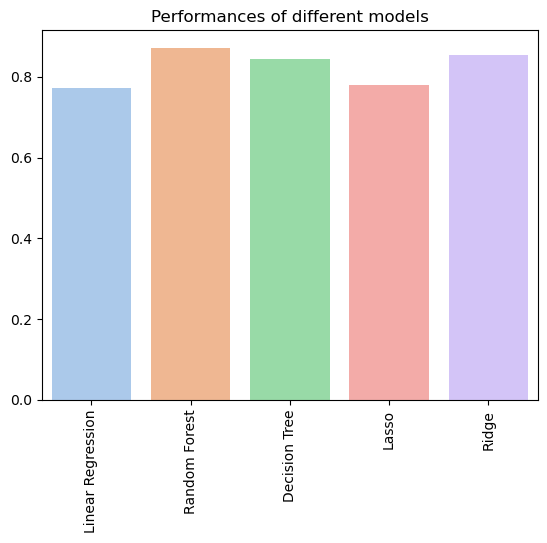

In [100]:
result_df = pd.Series(index=result.keys(), data=result.values())

sns.barplot(x=result_df.index, y=result_df, palette='pastel')
plt.xticks(rotation=90)
plt.title('Performances of different models')
plt.show()

<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#6096B4;
            font-size:70%;
            font-family:Helvetica;
            letter-spacing:2px">
    <h3 style='padding: 15px;
              color:white;
              text-align:center;'>
        10. Conclusion
    </h3>
</div>

**Random Forest** Algorithm predicts best compared to the other algorithms with the r2 score of **87%** after training with base 10 logarithm of target column